In [151]:
import pandas as pd 
import numpy as np

# Machine learning pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import set_config
set_config(display="diagram")

from sklearn.feature_selection import SelectFromModel, SelectKBest

# Models 
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC


# Metrics and graph
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

Note! -> dataset "class" : good = 1 , bad = 0

In [139]:
def object_to_cat(df):
    tmp = df.copy()
    for col in tmp.columns:
        if np.dtype(tmp[col]) == "object":
            tmp[col] = tmp[col].astype("category")
    return tmp

In [140]:
df = pd.read_csv("dataset/german_clean.csv")
df = object_to_cat(df)
df 

,status,duration,credit_history,purpose,credit_amount,savings_account,present_employment,installment_rate,personal_status_sex,guarantors,...,property,age,installment_plan,housing,existing_credits,job,liables,telephone,foreign,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
991,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
992,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
993,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,0


In [141]:
SEED = 42
TARGET = 'class'
FEATURES = df.columns.drop(TARGET)

NUMERICAL = df[FEATURES].select_dtypes('number').columns
print(f"Numerical features: {', '.join(NUMERICAL)}")

CATEGORICAL = pd.Index(np.setdiff1d(FEATURES, NUMERICAL))   # .setdiff1d - Return the unique values in ar1 that are not in ar2
print(f"Categorical features: {', '.join(CATEGORICAL)}")

Numerical features: duration, credit_amount, installment_rate, residence, age, existing_credits, liables
Categorical features: credit_history, foreign, guarantors, housing, installment_plan, job, personal_status_sex, present_employment, property, purpose, savings_account, status, telephone


In [142]:
X = df.drop(columns=TARGET)
y = df[TARGET]

In [143]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)
])


LinerSVC

In [144]:
# Split train-test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED, 
                                    stratify=df[TARGET])

In [160]:
linear_SVC_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearSVC())
])

linear_SVC_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['duration', 'credit_amount', 'installment_rate', 'residence', 'age',
       'existing_credits', 'liables'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['credit_history', 'foreign', 'guarantors', 'housing',
       'installment_plan', 'job', 'personal_status_sex', 'present_employment',
       'property', 'purpose', 'savings_account', 'status', 'telephone'],
      dtype='object'))])),
                ('model', LinearSVC())])

In [161]:
y_pred = linear_SVC_pipe.predict(X_test)
accuracy = linear_SVC_pipe.score(X_test, y_test)

print("accuracy: ",accuracy)
print("f1_score: ",f1_score(y_test, y_pred, average="weighted"))

accuracy:  0.7738693467336684
f1_score:  0.769496791803447


In [162]:
target_names = ['bad', 'good']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         bad       0.63      0.56      0.59        59
        good       0.82      0.86      0.84       140

    accuracy                           0.77       199
   macro avg       0.73      0.71      0.72       199
weighted avg       0.77      0.77      0.77       199



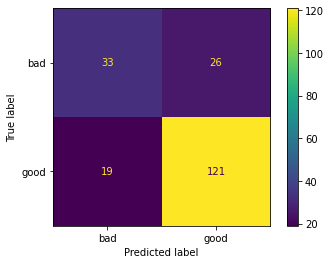

Total test data ->  199


In [163]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=target_names)
disp = disp.plot()
plt.show()
print("Total test data -> ", X_test.shape[0])

Random Forest

In [164]:
# Split train-test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED, 
                                    stratify=df[TARGET])

In [169]:
rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['duration', 'credit_amount', 'installment_rate', 'residence', 'age',
       'existing_credits', 'liables'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['credit_history', 'foreign', 'guarantors', 'housing',
       'installment_plan', 'job', 'personal_status_sex', 'present_employment',
       'property', 'purpose', 'savings_account', 'status', 'telephone'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

In [170]:
y_pred = rf_pipe.predict(X_test)
accuracy = rf_pipe.score(X_test, y_test)

print("accuracy: ",accuracy)
print("f1_score: ",f1_score(y_test, y_pred, average="weighted"))

accuracy:  0.7788944723618091
f1_score:  0.7637028680819061


In [171]:
target_names = ['bad', 'good']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         bad       0.69      0.46      0.55        59
        good       0.80      0.91      0.85       140

    accuracy                           0.78       199
   macro avg       0.75      0.69      0.70       199
weighted avg       0.77      0.78      0.76       199



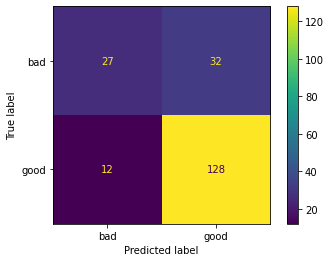

Total test data ->  199


In [172]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=target_names)
disp = disp.plot()
plt.show()
print("Total test data -> ", X_test.shape[0])

GaussianNB

In [173]:
from sklearn.naive_bayes import GaussianNB

In [174]:
# Split train-test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED, 
                                    stratify=df[TARGET])

In [175]:
gaussian_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GaussianNB())
])

gaussian_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['duration', 'credit_amount', 'installment_rate', 'residence', 'age',
       'existing_credits', 'liables'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['credit_history', 'foreign', 'guarantors', 'housing',
       'installment_plan', 'job', 'personal_status_sex', 'present_employment',
       'property', 'purpose', 'savings_account', 'status', 'telephone'],
      dtype='object'))])),
                ('model', GaussianNB())])

In [180]:
y_pred = gaussian_pipe.predict(X_test)
accuracy = gaussian_pipe.score(X_test, y_test)

print("accuracy: ",accuracy)
print("f1_score: ",f1_score(y_test, y_pred, average="weighted"))

target_names = ['bad', 'good']

print(classification_report(y_test, y_pred, target_names=target_names))

accuracy:  0.7135678391959799
f1_score:  0.7241123241840463
              precision    recall  f1-score   support

         bad       0.51      0.71      0.60        59
        good       0.85      0.71      0.78       140

    accuracy                           0.71       199
   macro avg       0.68      0.71      0.69       199
weighted avg       0.75      0.71      0.72       199



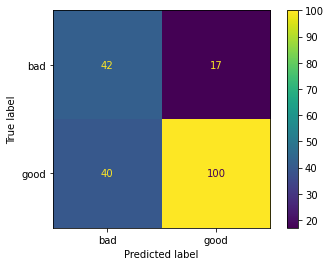

Total test data ->  199


In [181]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=target_names)
disp = disp.plot()
plt.show()
print("Total test data -> ", X_test.shape[0])